# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


План работы
    
1. Открыть файл и ознакомиться с данными.
2. Предобработка данных:
    2.1 Посмотреть пропуски
    2.2 Посмотреть общее колличество данных
    2.3 Заполнить пропущенные значения по возможности
    2.4 Найти и устранить редкие и выбивающиеся значения
    2.5 Рассмотрите типы данных в каждом столбце и если надо-заменить его
    2.6 Изучить уникальные значения в столбце с названиями и устраните неявные дубликаты
    2.7 Устранить явные дубоикаты
    2.8 Посмотреть, сколько данных в датафрейме осталось после обработки
3. Добавьте в таблицу новые столбцы
4.Провести исследовательский анализ данных:
    4.1 Изучить параметры объектов
    4.2 Изучить, как быстро продавались квартиры
    4.3 Изучить, какие факторы больше всего влияют на общую (полную) стоимость объекта
    4.4 Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    4.5 Вычислить среднюю цену каждого километра для квартир в Санкт-Петербурге и описать, как стоимость объектов зависит от расстояния до центра города. 
5. Общий вывод



## Открыть файл с данными и изучить общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')



In [2]:
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

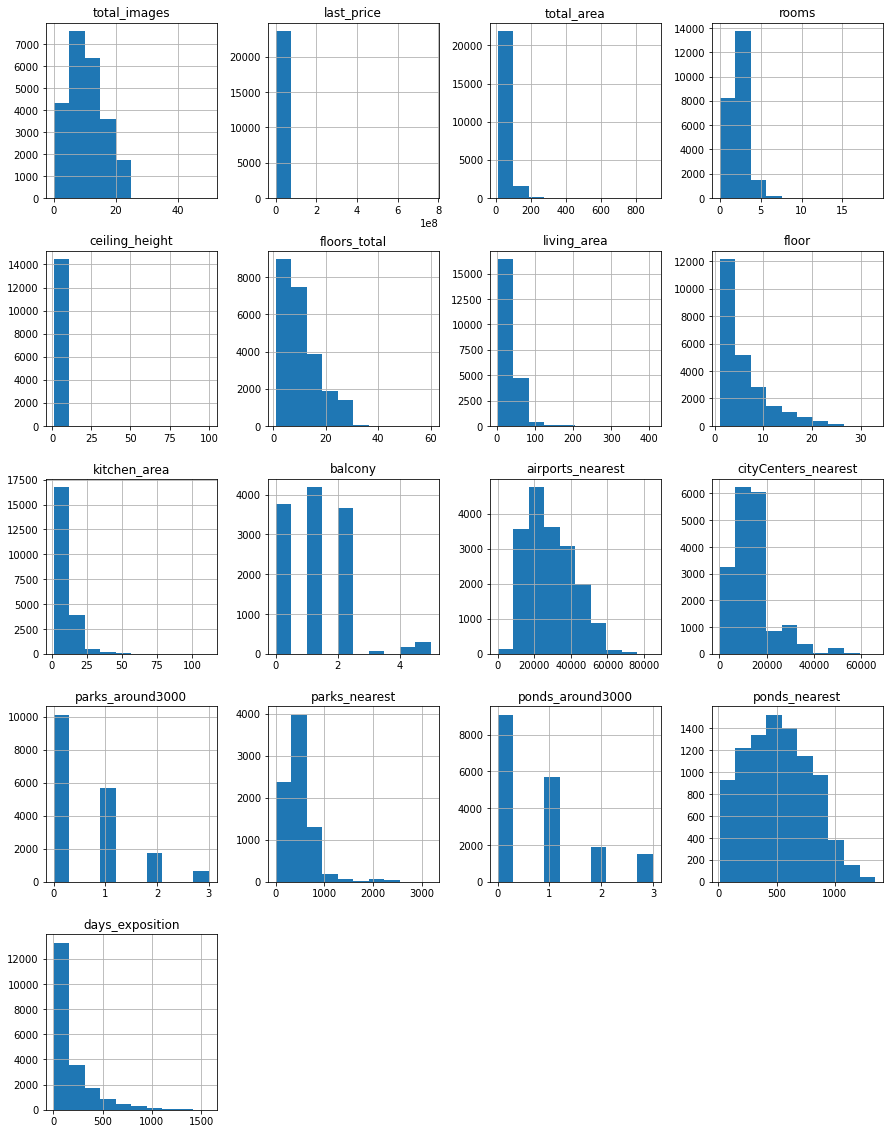

In [4]:
data.hist(figsize=(15,20))

## Предобработка данных

Посмотреть, сколько пропусков значений в каких столбцах  сколько строк изначально.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
shape = data.shape

Построить boxplot график и гистограму, что бы лучше представлять значений, которые есть в столбце 'ceiling_height'.

<AxesSubplot:>

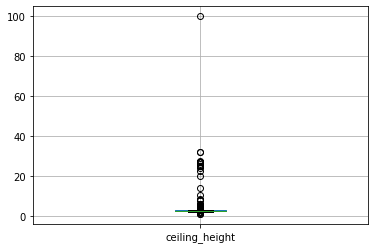

In [7]:
data.boxplot(column='ceiling_height')

In [8]:
data.loc[(data['ceiling_height'] >= 19) & (data['ceiling_height'] <= 40), 'ceiling_height'] /= 10

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<AxesSubplot:>

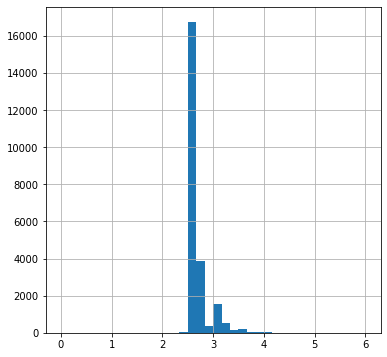

In [10]:
data['ceiling_height'].hist(bins=int(180/5), range=(0, 6), figsize=(6,6))

In [11]:
data = data[data['ceiling_height'] < 5]

In [12]:
data = data[data['ceiling_height'] > 2]

In [13]:
data['ceiling_height'].describe()

count    23669.000000
mean         2.696300
std          0.214699
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1898
floor                       0
is_apartment            20898
studio                      0
open_plan                   0
kitchen_area             2270
balcony                 11503
locality_name              49
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15603
ponds_around3000         5507
ponds_nearest           14572
days_exposition          3175
dtype: int64

Удаление этих значений ни как не повлияло на медиану.

Сгруппировать количество комнат и посчитать, выяснив количество квартир в каждой из групп. 

Оценить значения высоты домов

<AxesSubplot:>

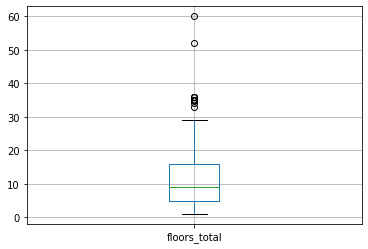

In [15]:
data.boxplot(column='floors_total')

Значение объекта быше 40 считаю явным отклонением и удаляю.

In [16]:
data = data[data['floors_total'] < 40]

Проверить, удалилось ли данное значение.

<AxesSubplot:>

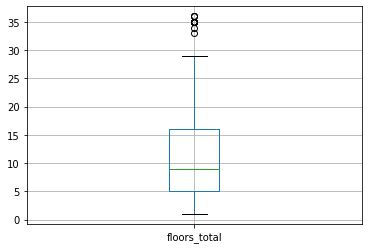

In [17]:
data.boxplot(column='floors_total')

In [18]:
data.groupby('rooms')['rooms'].count()

rooms
0      193
1     8001
2     7906
3     5789
4     1176
5      323
6      103
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Квартир, у которых 8 комнат и больше очень мало. На выборку влиять не будут. Понадобиться сгруппировать квартиры по количеству комнат, создав для этого столбец.

In [19]:
def grouping_rooms(quantity):
    try:
        if quantity== 0:
            return '0'
        elif quantity== 1:
            return '1'
        elif quantity== 2:
            return '2'
        elif quantity== 3:
            return '3'
        elif quantity== 4:
            return '4'
        elif quantity== 5:
            return '5'
        elif quantity== 6:
            return '6'
        elif quantity >= 7:
            return 'прочее'
    except:
        pass 

In [20]:
data['number_of_rooms'] = data['rooms'].apply(grouping_rooms)

Заполнить пропуски в столбце living_area медианными значениями по колличеству комнат number_of_rooms.

In [21]:
for t in data['number_of_rooms'].unique():
    data.loc[(data['number_of_rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['number_of_rooms'] == t), 'living_area'].median()

Удостовериться, были ли удалены пропуски в living_area.

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20810
studio                      0
open_plan                   0
kitchen_area             2223
balcony                 11462
locality_name              48
airports_nearest         5521
cityCenters_nearest      5498
parks_around3000         5497
parks_nearest           15551
ponds_around3000         5497
ponds_nearest           14534
days_exposition          3166
number_of_rooms             0
dtype: int64

Посмотреть на разброс значений living_area. 


<AxesSubplot:>

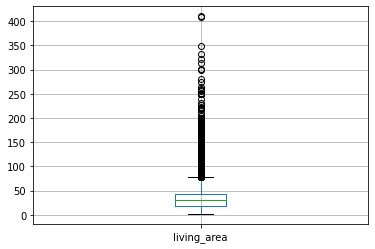

In [23]:
data.boxplot(column='living_area')

Жилая площадь может быть значительная и оснований считать, что указанные значения в 350 или 400 ошибочны - некорректно. По этому, оставить значения как есть.

Пропуски в столбце 'balcony' заменить на значение ноль, так как скорей всего, люди при отсутствие балконов значение ноль просто не проставляли, а оставляли значение не заполненным. 

In [24]:
data['balcony'] = data['balcony'].fillna(0)

Посмотреть, сколько квартир с каким колличеством балконов у нас в базе. Основное внимание к значениям 3, 4 и 5 балконов.

In [25]:
data.groupby('balcony')['balcony'].count() 

balcony
0.0    15171
1.0     4190
2.0     3654
3.0       81
4.0      183
5.0      302
Name: balcony, dtype: int64

Количество квартир имеющих 3 балкона ожидаемо мало, по сравнению с количеством квартир без балконов или с 1 и 2 балконами. Это логично, так как таких квартир строится меньше. А вот то, что количество квартир, где указано 4 и 5 балконов, превышает количество тех, у кого указано 3 балкона - и это аномалия. 
Скорее всего, значения 4 и 5, при заполнение людьми этих граф, означало то, что площадь балкона составляет 4 или 5 метров. Что бы лучше оценить, какие квартиры у нас имеют 4 и более балконов, можно вывести эти строки и ещё раз взглянуть на эти данные. 
Это можно сделать, так как количество строк с такими значениями относительно не велико.

In [26]:
data[data['balcony'] > 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,number_of_rooms
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0,3
42,13,22000000.0,161.80,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,4
116,18,10999000.0,97.20,2017-11-13T00:00:00,3,2.50,16.0,45.0,16,NaN,...,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0,3
121,20,33000000.0,180.00,2017-02-17T00:00:00,3,2.90,9.0,86.0,8,False,...,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,3
250,13,3200000.0,51.70,2019-01-22T00:00:00,2,2.65,16.0,29.2,5,NaN,...,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21T00:00:00,1,2.70,16.0,28.0,8,False,...,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23474,16,5900000.0,40.50,2019-03-16T00:00:00,2,2.73,17.0,31.0,16,NaN,...,4.0,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN,2
23497,17,6150000.0,55.40,2019-04-22T00:00:00,2,2.80,20.0,29.4,16,NaN,...,4.0,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN,2
23526,14,5800000.0,60.69,2018-03-13T00:00:00,3,2.50,9.0,39.7,2,NaN,...,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0,3


Квартиры с 1 и 2 комнатами, записаны как имеющие 4 или 5 балконов. Косьвенно, гипотеза подтверждается. Но наверника сказать нельзя. Так как кварттиры с 4 и 5 балконами нам не мешают в контексте данной жадачи, оставить данные без изменения. 

Этажность дома floors_total и наименование населённого пункта locality_name имеют пропуски. Удалить их, так как не имея точного адреса, нет инструмента для опреднеления названия населенного пункта и этажности дома. 

In [27]:
data = data.dropna(subset=['locality_name'])

In [28]:
data = data.dropna(subset=['floors_total'])

Проверить ещё раз, удалились ли пропуски. 

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20777
studio                      0
open_plan                   0
kitchen_area             2214
balcony                     0
locality_name               0
airports_nearest         5513
cityCenters_nearest      5490
parks_around3000         5489
parks_nearest           15518
ponds_around3000         5489
ponds_nearest           14511
days_exposition          3165
number_of_rooms             0
dtype: int64

Пропуски в столбце 'is_apartment' мы можем заменить на значение (False), так как не апартаментов гораздо больше и можно предположить, что люди когда заполняли, не ставили значения подразумевая, что данный объект не является апартаментами. 

In [30]:


data['is_apartment'] = data['is_apartment'].fillna(False)


Пропуски в строке площадь кухни - kitchen_area можно заменить медианым значением. 

In [31]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Проверить, были ли заменены пропуски в столбцах is_apartment и kitchen_area.

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5513
cityCenters_nearest      5490
parks_around3000         5489
parks_nearest           15518
ponds_around3000         5489
ponds_nearest           14511
days_exposition          3165
number_of_rooms             0
dtype: int64

Далее идут пропуски в данных, которые заполнялись автоматически. Построим гистограмы для лучшего понимания каждого из столбцов.

<AxesSubplot:>

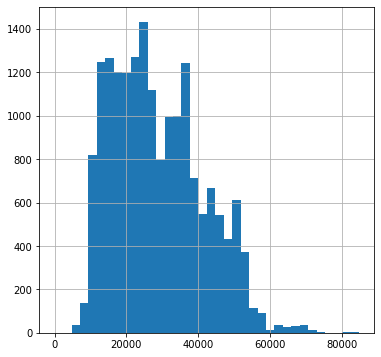

In [33]:
data['airports_nearest'].hist(bins=int(180/5), figsize=(6,6))

<AxesSubplot:>

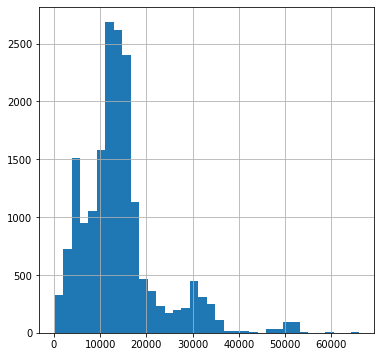

In [34]:
data['cityCenters_nearest'].hist(bins=int(180/5), figsize=(6,6))

<AxesSubplot:>

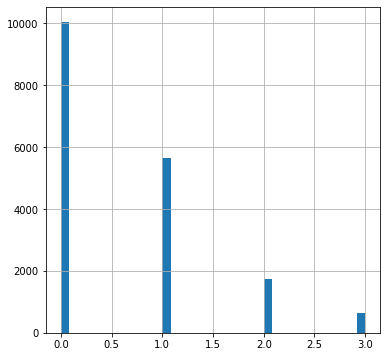

In [35]:
data['parks_around3000'].hist(bins=int(180/5), figsize=(6,6))

<AxesSubplot:>

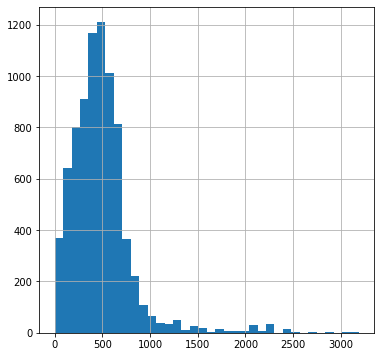

In [36]:
data['parks_nearest'].hist(bins=int(180/5), figsize=(6,6))

<AxesSubplot:>

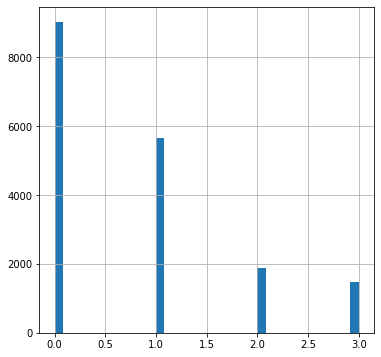

In [37]:
data['ponds_around3000'].hist(bins=int(180/5), figsize=(6,6))

<AxesSubplot:>

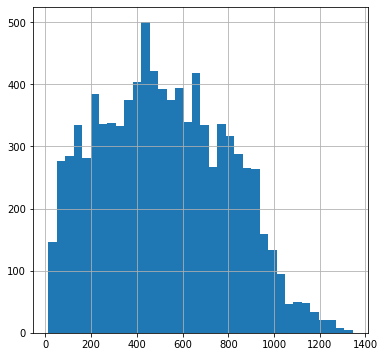

In [38]:
data['ponds_nearest'].hist(bins=int(180/5), figsize=(6,6))

В данных есть пропуски, но их природа не ясна. Если бы не было значения 0, можно было бы предположить, что пропуски в столбцах ponds_around3000 и parks_around3000 означали бы, что водоёмы и парки просто отсутствуют и значение не ставится. Но присутствие значения 0 говорит нам об обратном. Пропусков в столбцах parks_nearest и ponds_nearest слишком много. Замена недостающих значений в этих столбцах может слишком сильно изменить результат. Пропуски в airports_nearest и cityCenters_nearest в теории можно было бы заменить медианой, но так как причина отсутствия значений не ясна, и отсутствующие данные составляют более 10%, то пропуски оставить без изменения.

Значения столбцов floors_total и balcony имеют тип float64. Это не верно, так как количество этажей и балконов не может быть числом дробным.

In [39]:
data['floors_total'] = data['floors_total'].astype(int)

In [40]:
data['balcony'] = data['balcony'].astype(int) 

Проверить, изменился ли тип floors_total и balcony.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23533 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23533 non-null  int64  
 1   last_price            23533 non-null  float64
 2   total_area            23533 non-null  float64
 3   first_day_exposition  23533 non-null  object 
 4   rooms                 23533 non-null  int64  
 5   ceiling_height        23533 non-null  float64
 6   floors_total          23533 non-null  int64  
 7   living_area           23533 non-null  float64
 8   floor                 23533 non-null  int64  
 9   is_apartment          23533 non-null  bool   
 10  studio                23533 non-null  bool   
 11  open_plan             23533 non-null  bool   
 12  kitchen_area          23533 non-null  float64
 13  balcony               23533 non-null  int64  
 14  locality_name         23533 non-null  object 
 15  airports_nearest   

Изменить тип столбца first_day_exposition сobject на datetime.

In [42]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT')

Убедиться, что тип изменился.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23533 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23533 non-null  int64         
 1   last_price            23533 non-null  float64       
 2   total_area            23533 non-null  float64       
 3   first_day_exposition  23533 non-null  datetime64[ns]
 4   rooms                 23533 non-null  int64         
 5   ceiling_height        23533 non-null  float64       
 6   floors_total          23533 non-null  int64         
 7   living_area           23533 non-null  float64       
 8   floor                 23533 non-null  int64         
 9   is_apartment          23533 non-null  bool          
 10  studio                23533 non-null  bool          
 11  open_plan             23533 non-null  bool          
 12  kitchen_area          23533 non-null  float64       
 13  balcony         

При изучение столбца locality_name обнаружено много похожишь наименований, но которые по смыслу одинаковы, но различаются по написанию. Вызвать список уникальных значений столбца.

In [44]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посчитаем количество уникальных значений

In [45]:
data['locality_name'].nunique()

364

Заменить похожие значения, записаные разным образом, но означающие одно и тоже. Зпаменяем максимально на 'поселок'. Вывести столбец locality_name для визуальной проверки замены. Проверить количество уникальных значений. 

In [46]:
wrong_names = ['посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской посёлок', 'городской поселок']
loc_right_name = 'поселок'
for wrong_name in wrong_names:
    data['locality_name'] = data['locality_name'].str.replace(wrong_name, loc_right_name)
    
display(data['locality_name'])        
        
        



0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23533, dtype: object

In [47]:
data['locality_name'].nunique()


322

Проверить на наличие строк-дубликатов и узнать их количество.

In [48]:

data.duplicated().sum()

0

Дубликатов нет.

In [49]:
shape_1 = data.shape

In [50]:
shape_percent = (shape_1[0] / shape[0]) * 100

In [51]:
shape_percent

99.29954850415629

## Посчитайте и добавьте в таблицу новые столбцы

Добавить в таблицу новые столбцы с ценой одного квадратного метра и округлим значения в столбце до целых чисел.

In [52]:
data['price_of_one_square_meter'] = data['last_price'] / data['total_area']

In [53]:
data['price_of_one_square_meter'] = round(data['price_of_one_square_meter'])

Проверить значения нового столбца price_of_one_square_meter.

In [54]:
data['price_of_one_square_meter']

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_of_one_square_meter, Length: 23533, dtype: float64

Создать столбец weekday со значениями днями недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [55]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [56]:
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23533, dtype: int64

Создать столбец month в котором были бы месяца из колонки  first_day_exposition

In [57]:
data['month'] = data['first_day_exposition'].dt.month

Посмотреть созданный столбец month

In [58]:
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23533, dtype: int64

Создать столбец year в котором были бы года из колонки  first_day_exposition

In [59]:
data['year'] = data['first_day_exposition'].dt.year

Посмотреть созданный столбец year

In [60]:
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23533, dtype: int64

Создать новый столбец floor_type в таблице с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [61]:
def grouping_floor(floors):
    if floors['floor'] == 1:
        return 'первый'
    elif floors['floor'] == floors['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [62]:
data['floor_type'] = data.apply(grouping_floor, axis=1)

Вывести столпец floor_type, что бы визуально убедится. 

In [63]:
data['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23533, dtype: object

Создать новый столбец distance_to_the_city_center с расстоянием до центра города в километрах.

In [64]:
data['distance_to_the_city_center'] = round(data['cityCenters_nearest'] / 1000)

Вывести несколько строк измененного датасета, что бы визуально убедится в столюце distance_to_the_city_center.

In [65]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,number_of_rooms,price_of_one_square_meter,weekday,month,year,floor_type,distance_to_the_city_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,NaN,3,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81.0,1,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558.0,2,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,3.0,234.0,424.0,3,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,2,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,55.0,1,95066.0,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155.0,1,99196.0,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0.0,NaN,NaN,2,110545.0,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,189.0,1,87455.0,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289.0,3,88525.0,6,2,2017,другой,15.0


## Проведите исследовательский анализ данных

Построить гистограмму общей площади квартир.

<AxesSubplot:>

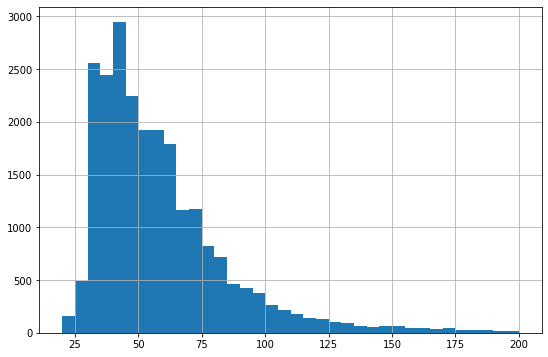

In [66]:
data['total_area'].hist(bins=int(180/5), range=(20, 200), figsize=(9,6))

Гистограмма общей площади имеет нормальный вид. Подавляющее большинство квартир имеет площадь от 20 до 200 метров. В таком диапазоне и был построен гистограм.
Большая часть значений находится в диапазоне от 30 до 50 метров. Так же значительное количество квартир мы наблюдаем в диапазоне от 50 до 75 метров. От 75 метров идёт плавное понижение количества площади в квадратных метрах. Можно сказать, что количество квартир с общей площадью более 125 метров мало относительно общего количества исследуемых объектов. А квартиры площадью более 200 метров хоть и встречаются, но это скорее единичные случаи. 

Построить гистограмму жилой площади квартир.

<AxesSubplot:>

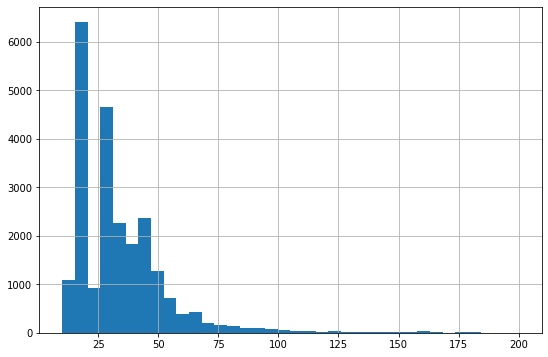

In [67]:
data['living_area'].hist(bins=int(180/5), range=(10, 200), figsize=(9,6))

На гистограмме жилой площади можно наблюдать две не равнозначные вершины. Одна от 15 до 20 метров, другая от 26 до 32. Это связанно с самыми популярными размерами комнат: однокомнатные и двухкомнатные квартиры соответственно. Большая часть значений жилой площади не превышает 50 метров. От 50 до 75 идёт понижение в количестве данных объектов и квартиры с площадью более 100 метров встречаются не часто. 

Построить гистограмму площади кухни.

<AxesSubplot:>

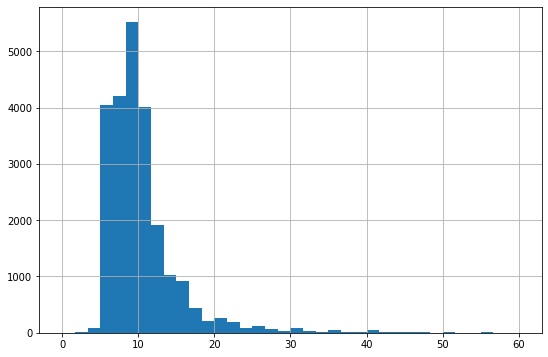

In [68]:
data['kitchen_area'].hist(bins=int(180/5), range=(0, 60), figsize=(9,6))

На гистограме видно, что большая часть квартир имеет кухни от 5 до 12 метров. И самыми распространёнными являются 9 метровые кухни. Кухни около 20 метров и до 30 встречаются и скорей всего это связанно с тем, что из кухни в современных домах делают столовую, соединяя по сути кухню и зал. До 40 метров такие варианты кухни встречаются, но с большей площадью-это уже редкость. Индивидуальные проекты и пожелания заказчиков. 

Построить гистограмму цены объекта. Для рассмотрения данной задачи построить 2 варианта с разным рассматриваемым диапазоном цен. От 500 тр до 20 млн и от 1 млн до 50 млн.

<AxesSubplot:>

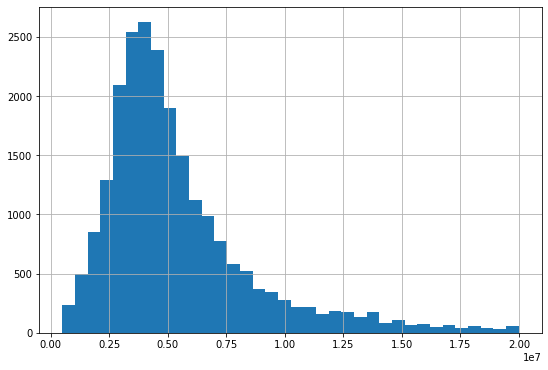

In [69]:
data['last_price'].hist(bins=int(180/5), range=(500000, 20000000), figsize=(9,6))

<AxesSubplot:>

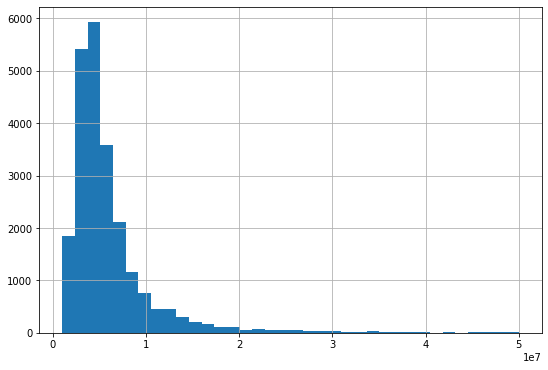

In [70]:
data['last_price'].hist(bins=int(180/5), range=(1000000, 50000000), figsize=(9,6))

Значительная часть объектов реализуется от 2.5 до 10 млн. От 5 млн и до 20 млн идёт сокращение реализации квартир с увеличением их стоимости. От 20 до 40 млн есть объявления, но их колличество значительно меньше, чем предыдущие группы. Квартиры стоимостью более 40 млн скорее редки. 

Построить гистограмму по количеству комнат.

<AxesSubplot:>

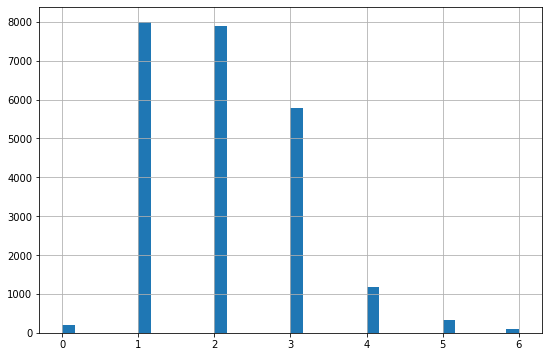

In [71]:
data['rooms'].hist(bins=int(180/5), range=(0, 6), figsize=(9,6))

Продажи однушек, двушек и трешек относительно велики. Двушки в объявлениях встречаются чаще всего. Число 4-х комнатних квартир гораздо меньше, а 5-ти и 6-ти комнатные квартиры встречаются редко. Более 6 комнат - скорее единичны. Так же присутствуют объекты с 0 комнат, но их число так же незначительно.

Построить гистограмму высоты потолков.

<AxesSubplot:>

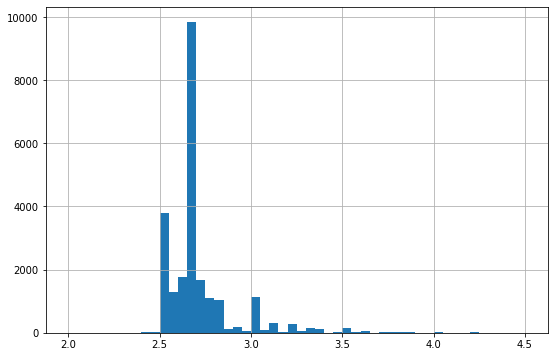

In [72]:
data['ceiling_height'].hist(bins=50, range=(2, 4.5), figsize=(9,6))

Высота потолков самая распространённая 2,5-2,55 метра. 2,7-2,8 метра ещё одна из распространённых высот. Так же встречается высота потолка 3,1 метра. Скорей всего "сталинка". Высота от 3,1 до 4 метров уже редка, а свыше 4 метров единичные объекты, так же как и высота менее 2,5 метров.

Построить гистограмму этажа объекта.

<AxesSubplot:>

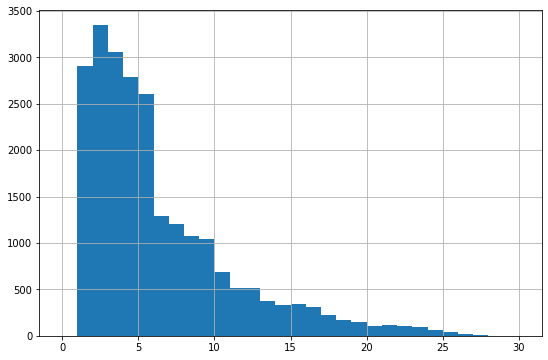

In [73]:
data['floor'].hist(bins=30, range=(0, 30), figsize=(9,6))

Больше всего предложений есть со второго по 6 этажи. Скорее всего это связанно с тем, что большое количество домов в 5 этажей было построено и плюс много живут на средних этажах людей из 9 и 10 этажек. А первые этажи выкуплены под магазины. До 10 этажа тоже распространены объявления, опять же потому что много было построено 9 и 10 этажных домов. Далее идёт плавное снижение количества объектов относительно высоты этажа. 

Построить гистограмму этажей в доме.

<AxesSubplot:>

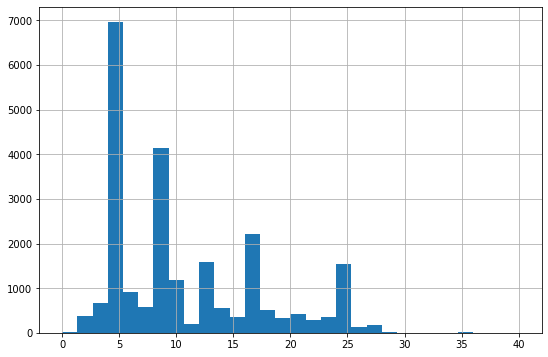

In [74]:
data['floors_total'].hist(bins=30, range=(0, 40), figsize=(9,6))

Большое колличество 5 этажных домов и 9 этажных домов. Так же видно, что популярны 16 и 25 этажные объекты недвижимости.

Построить гистаграмм типа квартиры(первый, последний, другой) 

<AxesSubplot:>

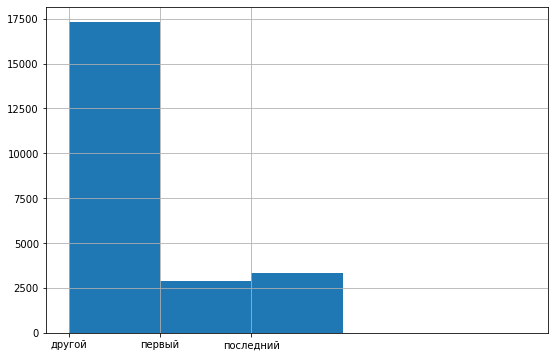

In [75]:
data['floor_type'].hist(bins=5, range=(0, 5), figsize=(9,6))

Первых и последних примерно в пять раз меньше, чем всех остальных. 

Построить гистаграмм расстояния до центра города в метрах.

<AxesSubplot:>

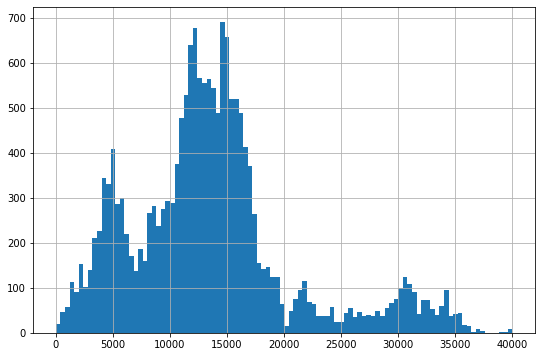

In [76]:
data['cityCenters_nearest'].hist(bins=100, range=(0, 40000), figsize=(9,6))

Большая часть объектов находится на удалении от центра до 20 километров. Самые большое колличество квартир на расстоянии 12 и 15 километров от центра, более 400. Так же чуть меньше 250 объектов находятся на удалении 5 километров. В самом центре и на удаление более 20 километров, не замечено предложений более 100 на 100 метров удаления. 

Построить гистаграмм расстояния до ближайшего аэропорта.

<AxesSubplot:>

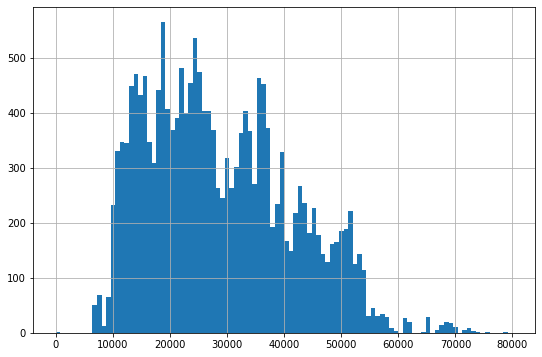

In [77]:
data['airports_nearest'].hist(bins=100, range=(0, 80000), figsize=(9,6))

Ближе 6 километров объектов нет, больше чем 75 километров удаления-тоже. Большая часть квартир выставленна на удалении от 10 до 40 километров. Максимальные показатели концентрации находятся на удалении 25 километров. 

Построить гистаграмм расстояния до ближайшего парка

<AxesSubplot:>

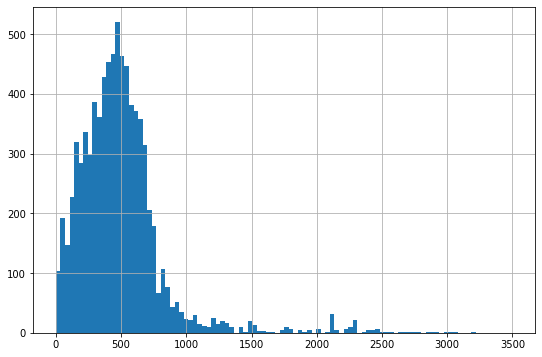

In [78]:
data['parks_nearest'].hist(bins=100, range=(0, 3500), figsize=(9,6))

Больше вчего объектов на ходятся на удаление от парка 850 метров м менее. Можно утверждать, что парков достаточное колличество и очень небольшое колличество квартир находятся на удаление более 1000 метров от парковых зон.

Построить гистограммы дня и месяца публикации объявления.

<AxesSubplot:>

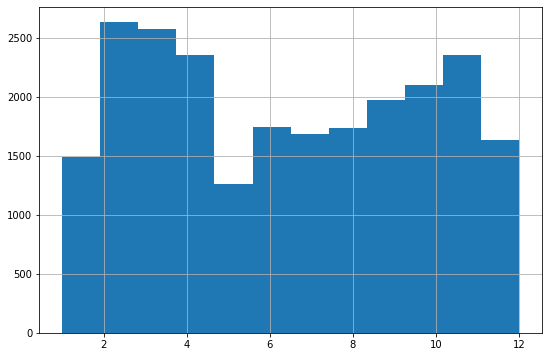

In [79]:
data['month'].hist(bins=12, figsize=(9,6))

<AxesSubplot:>

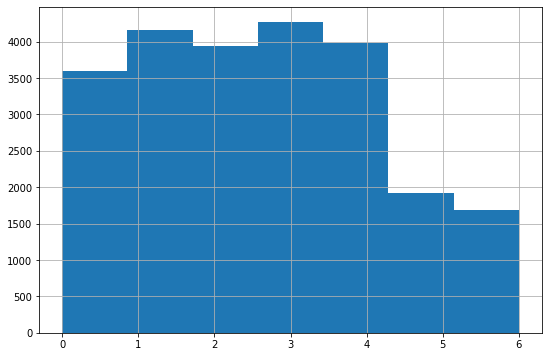

In [80]:
data['weekday'].hist(bins=7, figsize=(9,6))

В мае меньше всего продаж. Декабре и январе так же имеют явный спад. Феврал, март и апрель продажи максимальны. И после майской просадки начинает в течение лета и осени рост до ноября месяца. 
Во вторник и четверг больше всего публикуется объявлений. Скорей всего это связано с тем, что подаются они за день, в понедельник и среду. В рабочие дни их колличество рознится не сильно, достаточно превосходя число объявлений опубликованных в выходные дни. 

Построить гистограмм-как быстро продавалась квартира, а так посчитать среднее и медиану.

<AxesSubplot:>

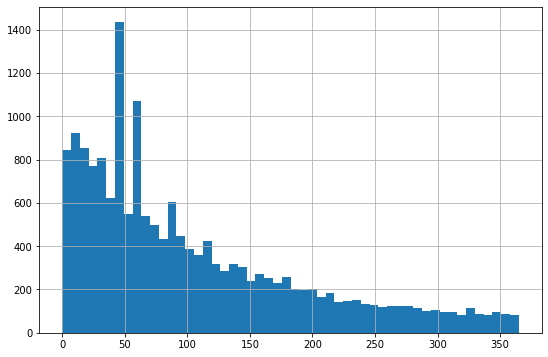

In [81]:
data['days_exposition'].hist(bins=52, range=(0, 365), figsize=(9,6))

In [82]:
data['days_exposition'].describe()

count    20368.000000
mean       180.748773
std        219.764507
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

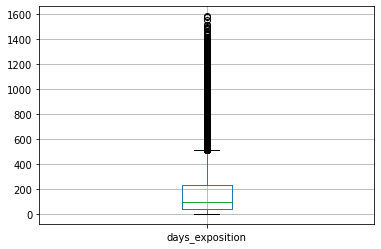

In [83]:
data.boxplot(column='days_exposition')

На гистограмме видно, что пик продаж приходится на 7 и 9 недели. В первый месяц так же стабильно высокие показатели продаж. Можно говорить, что в среднем, продажа занимает чуть больше 3-х месяцев. Медианное значение 103 дня. Среднее значение 190 дней. От 45 и до 247 дней -промежуток от 1 до 3 квартиля. Этот промежуток можно рассматривать как нормальное время продаж. Из этого следует, что менее 45 дней ушедшие объекты можно считать быстрыми продажами, и более 247 дней - необычно долгими. Так же есть от 4 до 25 объявлений, которые висят годами. 
Так же значения более 550 дней можно считать выбросами и отклонениями от нормы.

Зависит ли стоимость объекта от общей площади.

<AxesSubplot:xlabel='total_area'>

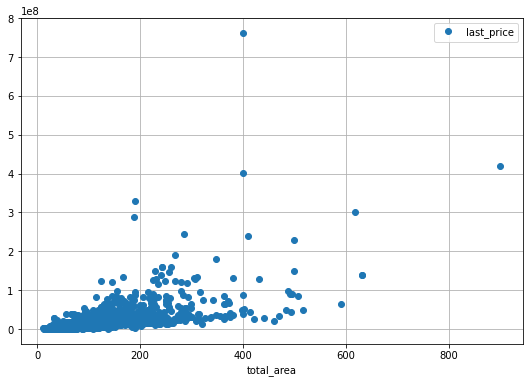

In [84]:
data.plot(x='total_area', y='last_price', style='o', grid=True, figsize = (9, 6))

In [85]:
data['total_area'].corr(data['last_price'])

0.6519582418784409

У стоимости объекта с площадью есть прямая корелляция. Цена с площадью хорошо кореллирует до 300 кв.м. Потом разброс значений очень значителен.

Зависит ли стоимость объекта от жилой площади.

<AxesSubplot:xlabel='living_area'>

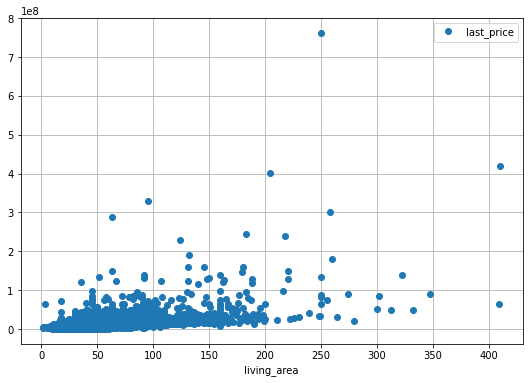

In [86]:
data.plot(x='living_area', y='last_price', style='o', grid=True, figsize = (9, 6))

In [87]:
data['living_area'].corr(data['last_price'])

0.5533990048520288

Прямая зависимость есть. Цена хорошо кореллирует с жилой площадью до 160 метров. Далее разброс цен увеличивается и корелляция уменьшается.

Зависит ли стоимость объекта от площади кухни. 

<AxesSubplot:xlabel='kitchen_area'>

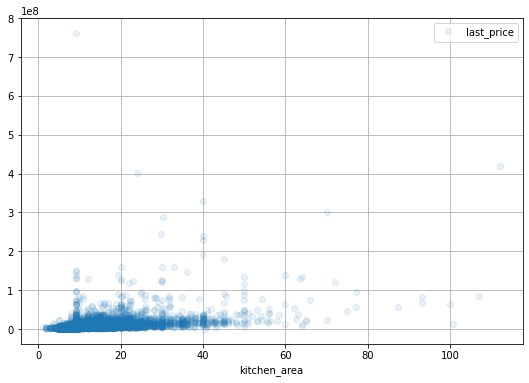

In [88]:
data.plot(x='kitchen_area', y='last_price', style='o', alpha=0.1, grid=True, figsize = (9, 6))

In [89]:
data['kitchen_area'].corr(data['last_price'])

0.4383198514258878

Хоть прямая корелляция присутствует, но она не сильная. 

Зависит ли стоимость объекта от числа комнат. 

<AxesSubplot:xlabel='rooms'>

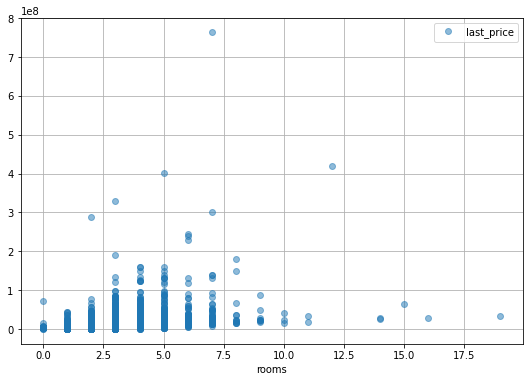

In [90]:
data.plot(x='rooms', y='last_price', style='o', alpha=0.5, grid=True, figsize = (9, 6))

In [91]:
data['rooms'].corr(data['last_price'])

0.36236082478262926

Хоть и наблюдается положительная зависимость, но она слабая. Велико число разбросов. 

Зависит ли стоимость объекта от этажа, на котором расположена квартира (первый, последний, другой). 

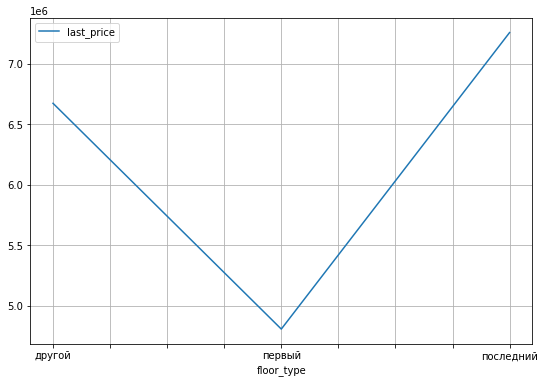

In [92]:
data.pivot_table(index = 'floor_type', values = 'last_price').plot(style = '-', grid=True, figsize = (9, 6))
plt.show()

Зависимость в том, что первые этажи дешевле чем все прочие. 

Зависит ли стоимость объекта от дня, месяца и года подачи объявления.

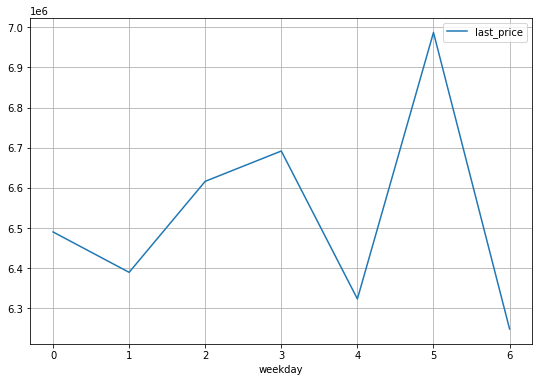

In [93]:
data.pivot_table(index = 'weekday', values = 'last_price').plot(style = '-', grid=True, figsize = (9, 6))
plt.show()

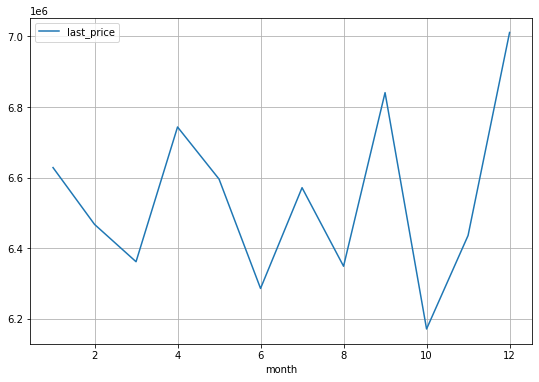

In [94]:
data.pivot_table(index = 'month', values = 'last_price').plot(style = '-', grid=True, figsize = (9, 6))
plt.show()

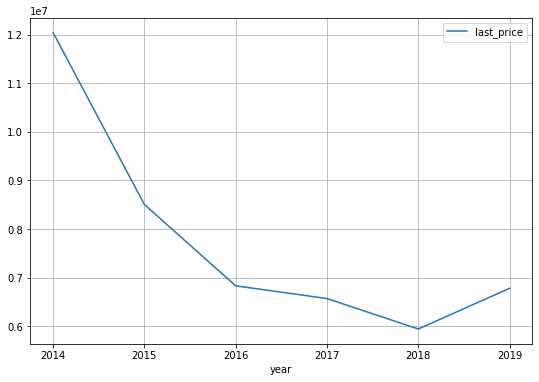

In [95]:
data.pivot_table(index = 'year', values = 'last_price').plot(style = '-', grid=True, figsize = (9, 6))
plt.show()

Начиная с 2014 года цена снижалась до 2016, оставалась практически без изменения в 2017, потом в 2018 году был спад и восстановление в 2019 до уровней цен 2017 года. 
В целом, начиная с января по март цены снижаются, в апреле цена выше, май и июнь цены вновь снижаются. В июле подъем цен до уровня апреля. Далее идет снижение цены до октября и потом рост до нового конца декабря. 
В течение недели с понедельника по среду цена особо не меняется, в четверг видет рост и дальнейшее снижение в пятницу и субботу. Потом идет незначительный подъем цены в воскресенье. 

Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Создадим сводную таблицу, где строки будут соответствовать населенным пунктам, а столбцы будут содержать количество объявлений и среднюю стоимость одного квадратного метра.

In [96]:
grouped_data = data.pivot_table(index='locality_name', values='price_of_one_square_meter', aggfunc=['count', 'mean'])


In [97]:
grouped_data

,count,mean
,price_of_one_square_meter,price_of_one_square_meter
locality_name,,
Бокситогорск,15,17457.333333
Волосово,36,40183.305556
Волхов,111,35087.702703
Всеволожск,397,68719.322418
Выборг,235,58238.153191
...,...,...
село Путилово,2,39921.500000
село Рождествено,3,37733.000000


In [98]:
grouped_data.columns = ['number_of_ads', 'avg_per_sqm']

In [99]:
grouped_data = grouped_data.sort_values(by='number_of_ads', ascending=False).head(10)

In [100]:
grouped_data

,number_of_ads,avg_per_sqm
locality_name,,
Санкт-Петербург,15633,114769.630461
поселок Мурино,552,85629.567029
поселок Шушары,439,78551.359909
Всеволожск,397,68719.322418
Пушкин,369,103125.818428
Колпино,338,75424.571006
поселок Парголово,327,90175.886850
Гатчина,307,68746.110749
деревня Кудрово,299,92473.588629


In [101]:
grouped_data['avg_per_sqm'] = round(grouped_data['avg_per_sqm'])

In [102]:
grouped_data = grouped_data.sort_values(by='avg_per_sqm', ascending=False)

In [103]:
grouped_data

,number_of_ads,avg_per_sqm
locality_name,,
Санкт-Петербург,15633,114770.0
Пушкин,369,103126.0
деревня Кудрово,299,92474.0
поселок Парголово,327,90176.0
поселок Мурино,552,85630.0
поселок Шушары,439,78551.0
Колпино,338,75425.0
Гатчина,307,68746.0
Всеволожск,397,68719.0


Список 10 населенных пунктов с максимальным колличеством объявлений: Санкт-Петербург, Всеволожск, Пушкин, поселок Шушары, поселок Мурино, Колпино, Гатчина, Петергоф, поселок Парголово, Сестрорецк. Цена за квадратный метр самая высокая в Санкт-Петербурге, а самая низкая во Всеволожске.

In [104]:
good_data = data[data['locality_name'] == 'Санкт-Петербург']

In [105]:
distance_to_the_city_center_data = good_data.pivot_table(index='distance_to_the_city_center', values='last_price', aggfunc=['mean'])

In [106]:
distance_to_the_city_center_data

,mean
,last_price
distance_to_the_city_center,
0.0,3.144912e+07
1.0,2.127482e+07
2.0,1.778832e+07
3.0,1.113739e+07
4.0,1.331797e+07
5.0,1.430223e+07
6.0,1.513335e+07
7.0,1.454352e+07


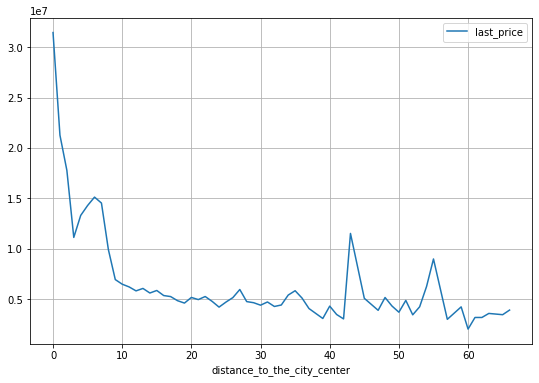

In [107]:
data.pivot_table(index = 'distance_to_the_city_center', values = 'last_price').plot(style = '-', grid=True, figsize = (9, 6))
plt.show()

<AxesSubplot:xlabel='distance_to_the_city_center'>

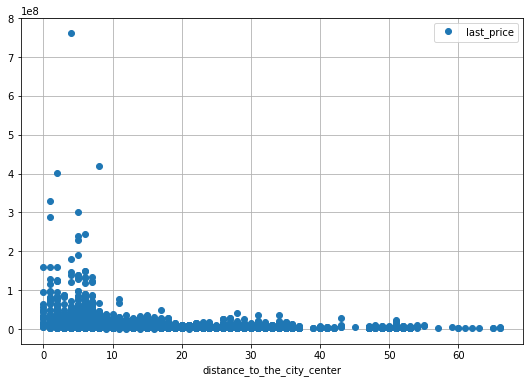

In [108]:
data.plot(x='distance_to_the_city_center', y='last_price', style='o', grid=True, figsize = (9, 6))

Можно сказать, что по мере удаления от центра, цена на объект снижается. На расстоянии одного километра от центра средняя стоимость квартир от 22 млд до 22,8 млн. Самая ощутимая потеря в цене по мере удаления от центра происходит в первые 10 км. На этом расстояние, цена в среднем будет составлять уже 6,8 млн. Далее, скорость снижения цены от расстояния и уменьшается и разница между 10-м и 20-м километром уже составляет 1.8 млн. На удаление 20 км и больше, зависимость исчезает, потому что скорее будут играть важную роль сами населенные пункты, качество объекта недвижимости и инфраструктура.

## Общий вывод

**Чек-лист готовности проекта**



Первичная обработка
1. В процессе обработки данных было выявленно, что присутствуют значительные отклонения в высоте потолков. Оставлены были значения потолка от 2 до 5 метров. 
2. В данных floors_total (общая высота дома) были удалены значения выше 40 этажа. 
3. Квартир, у которых 8 комнат и больше очень мало. На выборку влиять не будут. Понадобиться сгруппировать квартиры по количеству комнат, создав для этого отдельный столбец. Благодаря этому, пропуски в столбце living_area были заполненны медианны значениями по колличеству комнат number_of_rooms.
4. Жилая площадь может быть значительная и оснований считать, что указанные значения в 350 или 400 ошибочны - некорректно. По этому, оставить значения как есть.
5. Пропуски в столбце 'balcony' были заменены на значение ноль, так как скорей всего, люди при отсутствие балконов значение ноль просто не проставляли, а оставляли значение не заполненным. Квартиры с 1 и 2 комнатами, записаны как имеющие 4 или 5 балконов. Косьвенно, гипотеза подтверждается. Но наверника сказать нельзя. Так как кварттиры с 4 и 5 балконами нам не мешают в контексте данной жадачи, оставить данные без изменения.
6. Этажность дома floors_total и наименование населённого пункта locality_name имеют пропуски. Пропуски были удалены, так как не имея точного адреса, нет инструмента для опреднеления названия населенного пункта и этажности дома. 
7. Пропуски в столбце 'is_apartment' заменены на значение (False), так как не апартаментов гораздо больше и можно предположить, что люди когда заполняли, не ставили значения подразумевая, что данный объект не является апартаментами.
8. Пропуски в строке площадь кухни - kitchen_area заменены на медианые значения.
9. Далее рассматривались столбцы airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 
В данных есть пропуски, но их природа не ясна. Если бы не было значения 0, можно было бы предположить, что пропуски в столбцах ponds_around3000 и parks_around3000 означали бы, что водоёмы и парки просто отсутствуют и значение не ставится. Но присутствие значения 0 говорит нам об обратном. Пропусков в столбцах parks_nearest и ponds_nearest слишком много. Замена недостающих значений в этих столбцах может слишком сильно изменить результат. Пропуски в airports_nearest и cityCenters_nearest в теории можно было бы заменить медианой, но так как причина отсутствия значений не ясна, и отсутствующие данные составляют более 10%, то пропуски оставить без изменения.

Была произведена замена типа столбцов. 
Значения столбцов floors_total и balcony имеют тип float64. Это не верно, так как количество этажей и балконов не может быть числом дробным. Замена на int(целые числа) была логичной.
Ещё была замена типа столбца first_day_exposition сobject на datetime.
При изучение столбца locality_name обнаружено много похожишь наименований, но которые по смыслу одинаковы, но различаются по написанию. Они были заменены на 'поселок'. Количество уникальных названий с 281 сократилось до 251.
В обработке данных явные дубликаты не выявлены. 

Для лучшего анализа данных были добавлены столбцы:
1. price_of_one_square_meter цена одного квадратного метра и округленная до целых чисел.
2. weekday со значениями дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
3. month в котором были бы месяца из колонки first_day_exposition.
4. year в котором были бы года из колонки first_day_exposition.
5. floor_type в таблице с типом этажа квартиры (значения — «первый», «последний», «другой»)
6. distance_to_the_city_center с расстоянием до центра города в километрах.

В результате исследовательского анализа выявленны следующие детали: 
1) В диапазоне от 30 до 75 метров общей площади находится большая часть квартир. Больше всего объектов с площадью около 40 метров. Однушки и студии самые популярные. 
2) По жилой площади видны два пика-от 15 до 20 метров и от 26 до 32 метров. Это соответствует однушкам и двушкам. 
3) большинство кухонь имеют площадь от 5 до 12 метров. 
4) цена на объекты конечно сильно различается, но все же большая часть находится в диапазоне от 2.5 до 10 млн.
5) продажи однушек, двушек и трешек относительно велики. Двушки в объявлениях встречаются чаще всего. 
6) высота потолков самая распространённая 2,5-2,55 метра. 2,7-2,8 метра ещё одна из распространённых высот. Так же встречается высота потолка 3,1 метра. Скорей всего "сталинка". Высота от 3,1 до 4 метров уже редка, а свыше 4 метров единичные объекты, так же как и высота менее 2,5 метров.
7) больше всего предложений есть со второго по 6 этажи. Скорее всего это связанно с тем, что большое количество домов в 5 этажей было построено и плюс много живут на средних этажах людей из 9 и 10 этажек.
8) большое колличество 5 этажных домов и 9 этажных домов. Так же видно, что популярны 16 и 25 этажные объекты недвижимости.
9) предложений на первом и на последних этажах примерно в пять раз меньше, чем всех остальных.
10) большая часть объектов находится на удалении от центра до 20 километров.
11) ближе 6 километров объектов у аэропорта нет, больше чем 75 километров удаления-тоже. Большая часть квартир выставленна на удалении от 10 до 40 километров.
12) больше вчего объектов на ходятся на удаление от парка 850 метров м менее. Можно утверждать, что парков достаточное колличество и очень небольшое колличество квартир находятся на удаление более 1000 метров от парковых зон.
13) в мае меньше всего продаж. Декабре и январе так же имеют явный спад. Феврал, март и апрель продажи максимальны. И после майской просадки начинает в течение лета и осени рост до ноября месяца. Во вторник и четверг больше всего публикуется объявлений. Скорей всего это связано с тем, что подаются они за день, в понедельник и среду. В рабочие дни их колличество рознится не сильно, достаточно превосходя число объявлений опубликованных в выходные дни.
14) пик продаж приходится на 7 и 9 недели. В первый месяц так же стабильно высокие показатели продаж. Можно говорить, что в среднем, продажа занимает чуть больше 3-х месяцев. Медианное значение 103 дня. Среднее значение 190 дней. От 45 и до 247 дней -промежуток от 1 до 3 квартиля. Этот промежуток можно рассматривать как нормальное время продаж. Из этого следует, что менее 45 дней ушедшие объекты можно считать быстрыми продажами, и более 247 дней - необычно долгими. Так же есть от 4 до 25 объявлений, которые висят годами. Так же значения более 550 дней можно считать выбросами и отклонениями от нормы.

В процессе работы были выявленны следующие зависимости:
1. У стоимости объекта с площадью есть прямая корелляция. Цена с площадью хорошо кореллирует до 300 кв.м. Потом разброс значений очень значителен.
2. Стоимость объекта и жилая площадь так же имеют прямую зависимость. Цена с площадью хорошо кореллирует до 300 кв.м. Потом разброс значений очень значителен.
3. У цены объекта и жилой площади похожие зависимости. Цена хорошо кореллирует с жилой площадью до 160 метров. Далее разброс цен увеличивается и корелляция уменьшается.
4. Зависимость стоимости квартиры - прямая корелляция присутствует, но она не сильная (коэффициент корелляции 0,5).
5. У цены объекта и количества комнат хоть и наблюдается положительная зависимость, но она слабая. Велико число разбросов и случаев не вписывающихся в прямую зависимость (коэффициент корелляции 0,4).
6. Вслучае с зависимостью цены от этажа (первый, последний, другой), тенденция говорит о том, что цена на первые этажи ниже, чем на последние и все другие.
7. Начиная с 2014 года цена снижалась до 2016, оставалась практически без изменения в 2017, потом в 2018 году был спад и восстановление в 2019 до уровней цен 2017 года. В целом, начиная с января по март цены снижаются, в апреле цена выше, май и июнь цены вновь снижаются. В июле подъем цен до уровня апреля. Далее идет снижение цены до октября и потом рост до нового конца декабря. В течение недели с понедельника по среду цена особо не меняется, в четверг видет рост и дальнейшее снижение в пятницу и субботу. Потом идет незначительный подъем цены в воскресенье.

В рамках исследования выявленно 10 населенных пунктов с максимальным колличеством объявлений: Санкт-Петербург, Всеволожск, Пушкин, поселок Шушары, поселок Мурино, Колпино, Гатчина, Петергоф, поселок Парголово, Сестрорецк. Цена за квадратный метр самая высокая в Санкт-Петербурге, а самая низкая во Всеволожске.

Можно отметить, что по мере удаления от центра, цена на объект снижается. На расстоянии одного километра от центра средняя стоимость квартир от 22 млд до 22,8 млн. Самая ощутимая потеря в цене по мере удаления от центра происходит в первые 10 км. На этом расстояние, цена в среднем будет составлять уже 6,8 млн. Далее, скорость снижения цены от расстояния и уменьшается и разница между 10-м и 20-м километром уже составляет 1.8 млн. На удаление 20 км и больше, зависимость исчезает, потому что скорее будут играть важную роль сами населенные пункты, качество объекта недвижимости и инфраструктура.
